In [2]:
import pandas as pd

from scipy.stats import kstest, norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **IMPORTING**

In [3]:
dfRaw = pd.read_csv('melb_data.csv')
display(dfRaw.info(), dfRaw.describe(), dfRaw.describe(exclude='number'), dfRaw.isnull().sum(), dfRaw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

None

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## **CLEANSING DATA**

In [4]:
df = dfRaw.copy()
#CLEANSING FOR NULL VALUE

#Car
df['Car'].fillna(0,inplace=True)

#Building Area
df['BuildingArea'].fillna(0,inplace=True)

#Year Built
df['YearBuilt'].fillna(0,inplace=True)

#Council Area
df['CouncilArea'].fillna('undetermined',inplace=True)

In [5]:
#Drop Anomali

#landsize == 0
df.drop(df[df['Landsize']==0].index, inplace=True)
len(df)

11641

## **SOAL**

1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:
- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

In [6]:
def inputKStest(data, varName, alpha):
#    var_name = inspect.currentframe().f_locals[data]
    stat_value, p_value = kstest(data, 'norm')
    if p_value > alpha:
        print(f"{varName} data has a normal distribution")
    else:
        print(f"{varName} data does not have a normal distribution")

In [7]:
#Distribusi Data menggunakan Kolmogrov-Smirnov Test
print('DISTRIBUTION DATA')
inputKStest(df['Landsize'],'LandSize', 0.05)
inputKStest(df['Price'],'Price', 0.05)

#Titik Pusat Data
#Karena kedua column tidak terdistribusi secara normal maka menggunakan median untuk menentukan nilai Central Tendency
print('\nCENTRAL TENDENCY')
print(f'Median Landsize : {df["Landsize"].median()}; Median Price : {df["Price"].median()}')

#Dispresi Data (Persebaran)
print('\nDISPERSION DATA\n1. Landsize')
print('Range        :', df['Landsize'].describe()['max']-df['Landsize'].describe()['min'])
print('STD          :', df['Landsize'].describe()['std'])
print('Q1           :', df['Landsize'].describe()['25%'])
print('Q3           :', df['Landsize'].describe()['75%'])

print('\n2. Price')
print('Range        :', df['Price'].describe()['max']-df['Landsize'].describe()['min'])
print('STD          :', df['Price'].describe()['std'])
print('Q1           :', df['Price'].describe()['25%'])
print('Q3           :', df['Price'].describe()['75%'])


DISTRIBUTION DATA
LandSize data does not have a normal distribution
Price data does not have a normal distribution

CENTRAL TENDENCY
Median Landsize : 533.0; Median Price : 973500.0

DISPERSION DATA
1. Landsize
Range        : 433013.0
STD          : 4303.221597742779
Q1           : 270.0
Q3           : 676.0

2. Price
Range        : 8999999.0
STD          : 647655.9761772577
Q1           : 715000.0
Q3           : 1400000.0


2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot
untuk menampilkan adanya data outlier!

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8741,Berwick,96 Avebury Dr,4,h,627500.0,SP,C21,1/07/2017,35.2,3806.0,...,2.0,2.0,687.0,0.0,0.0,Casey,-38.02434,145.33117,Eastern Victoria,17093.0
8742,Boronia,39 Lockwoods Rd,3,h,642000.0,S,Stockdale,1/07/2017,25.0,3155.0,...,2.0,2.0,968.0,0.0,0.0,Knox,-37.84674,145.29351,Eastern Metropolitan,9704.0
8782,Cranbourne,26 Mundaring Dr,5,h,572000.0,S,O'Brien,1/07/2017,34.7,3977.0,...,2.0,1.0,581.0,0.0,0.0,Casey,-38.10687,145.28110,South-Eastern Metropolitan,7680.0
8786,Dandenong,5/6 MacPherson St,2,u,348000.0,S,McLennan,1/07/2017,24.7,3175.0,...,1.0,0.0,156.0,0.0,0.0,Greater Dandenong,-37.98712,145.22262,South-Eastern Metropolitan,10894.0
8787,Dandenong North,110 Gladstone Rd,3,h,627000.0,S,Barry,1/07/2017,24.7,3175.0,...,1.0,1.0,610.0,120.0,1970.0,Greater Dandenong,-37.96322,145.20586,South-Eastern Metropolitan,8322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,Seaford,137 East Rd,3,h,512000.0,S,hockingstuart,26/08/2017,35.4,3198.0,...,1.0,1.0,576.0,105.0,1983.0,undetermined,-38.10505,145.15328,South-Eastern Metropolitan,8077.0
13545,Sunbury,31 Barkly St,3,h,516000.0,S,Raine,26/08/2017,31.7,3429.0,...,2.0,3.0,588.0,110.0,0.0,undetermined,-37.58176,144.73177,Western Metropolitan,14092.0
13546,Sunbury,7 Fullbrook Dr,3,h,480000.0,PI,Leeburn,26/08/2017,31.7,3429.0,...,2.0,2.0,646.0,0.0,0.0,undetermined,-37.56005,144.70892,Western Metropolitan,14092.0
13547,Sunbury,37 Ligar St,4,h,763000.0,S,Brad,26/08/2017,31.7,3429.0,...,2.0,2.0,1011.0,0.0,0.0,undetermined,-37.57810,144.72383,Western Metropolitan,14092.0


Jumlah Outlier: 409


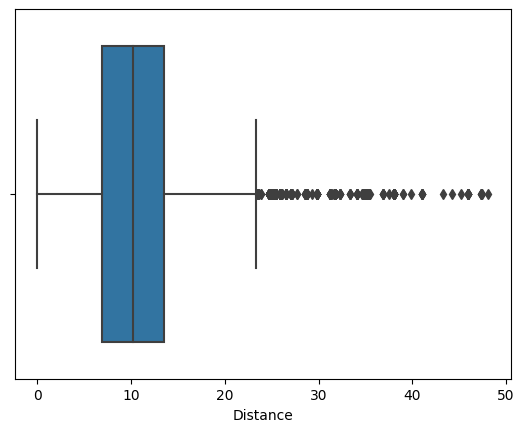

Dari diagram box di atas dapat disimpulkan bahwa 3.51% Rumah berada jauh dari pusat niaga dibandingkan dengan rumah-rumah pada umumnya


In [8]:
#OUTLIER
df['Distance'].describe()
distanceIQR = df['Distance'].describe()['75%'] - df['Distance'].describe()['25%']
lwDistanceOut = df['Distance'].describe()['25%'] - (1.5*distanceIQR)
hglwDistanceOut = df['Distance'].describe()['75%'] + (1.5*distanceIQR)
outlier = df[(df['Distance'] < lwDistanceOut) | (df['Distance'] > hglwDistanceOut)]
display(outlier)
print('Jumlah Outlier:', len(outlier))

plt.figure()
sns.boxplot(data = df, x='Distance')
plt.show()

print(f'Dari diagram box di atas dapat disimpulkan bahwa {round((len(outlier)/len(df))*100,2)}% Rumah berada jauh dari pusat niaga dibandingkan dengan rumah-rumah pada umumnya')

3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt.
Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

11641

4724

6917

Dari data yang ada, terdapat 4724 rumah (40.58%) yang masih belum diketahui waktu pembuatannya
Terdapat 1 Pembangunan rumah dibawah tahun 1196


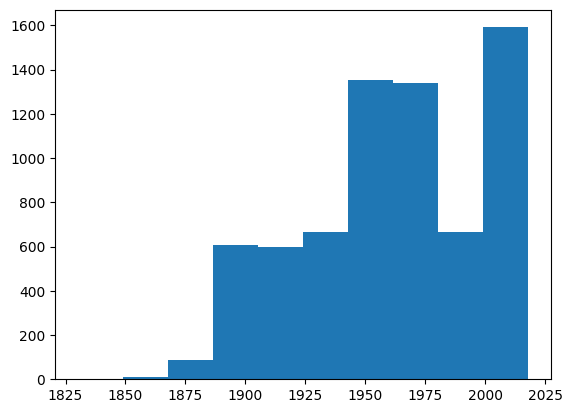

Pembangunan rumah secara data cenderung meningkat setiap tahunnya sejak tahun 1800, hanya saja terdapat anomali penurunan yang drastis pada rentang 1975-2000


In [9]:
display(len(df),len(df[df['YearBuilt'] == 0]),len(df[df['YearBuilt'] != 0]))

print(f'Dari data yang ada, terdapat {len(df[df["YearBuilt"] == 0])} rumah ({round(len(df[df["YearBuilt"] == 0])/len(df)*100,2)}%) yang masih belum diketahui waktu pembuatannya')
dfYearClean = df[df['YearBuilt']!=0]

dfYearClean[dfYearClean['YearBuilt']<1800]
print(f'Terdapat 1 Pembangunan rumah dibawah tahun 1196')

dfYearClean = dfYearClean[dfYearClean['YearBuilt']>1800]

plt.figure()
plt.hist(dfYearClean['YearBuilt'])
plt.show()

print(f'Pembangunan rumah secara data cenderung meningkat setiap tahunnya sejak tahun 1800, hanya saja terdapat anomali penurunan yang drastis pada rentang 1975-2000')


4. Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

,YearBuilt,Price
0,1830.0,8.550000e+05
1,1850.0,1.138500e+06
2,1854.0,3.310000e+06
3,1856.0,2.260000e+06
4,1857.0,2.200000e+06
...,...,...
137,2014.0,1.012209e+06
138,2015.0,1.343055e+06
139,2016.0,1.544679e+06
140,2017.0,1.073441e+06


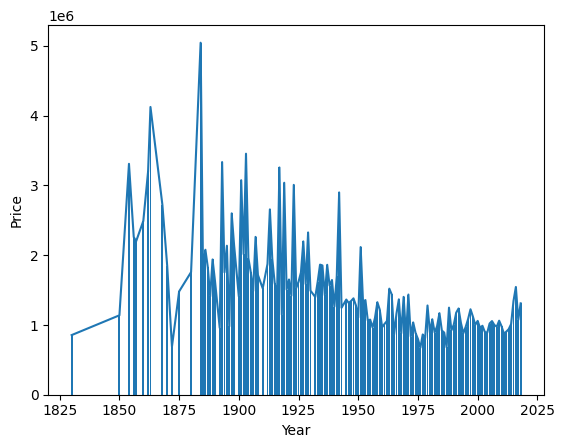

Bila dilihat dari rata-rata per tahun. Perkembangan tren naik sampai dengan


In [10]:
dfYearPrice = dfYearClean.groupby('YearBuilt')['Price'].mean().reset_index()

display(dfYearPrice)
plt.figure()

#Ploting Value
plt.bar(dfYearPrice['YearBuilt'],dfYearPrice['Price'])

sns.lineplot(
    data = dfYearPrice,
    x = 'YearBuilt',
    y = 'Price'
)

#LABELS
plt.xlabel('Year')
plt.show()

print(f'Bila dilihat dari rata-rata per tahun. Perkembangan tren naik sampai dengan')




5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [37]:
dfYearClean.drop(dfYearClean[(dfYearClean['Distance']==0)|(dfYearClean['Landsize']==1)].index,inplace=True)

inputKStest(dfYearClean['Landsize'],'LandSize', 0.05)
inputKStest(dfYearClean['Distance'],'Distance', 0.05)
inputKStest(dfYearClean['Rooms'],'Rooms', 0.05)

LandSize data does not have a normal distribution
Distance data does not have a normal distribution
Rooms data does not have a normal distribution


,Landsize,Distance,Rooms
Landsize,1.000000,0.293832,0.353832
Distance,0.293832,1.000000,0.253592
Rooms,0.353832,0.253592,1.000000


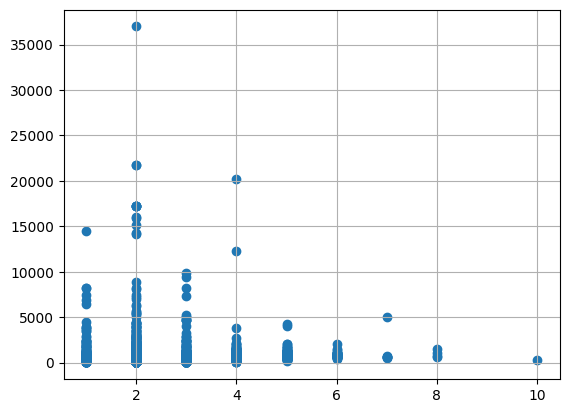


Nilai Korelasi tertinggi ada pada antara kolom rooms dan landsize. Korelasi dicari menggunakan metode spearman dikarenakan kolom-kolom tersebut tidak terdistribusi secara normal.



In [38]:
display(dfYearClean[['Landsize', 'Distance', 'Rooms']].corr(method='spearman'))
plt.figure()
plt.scatter(dfYearClean['Rooms'],dfYearClean['Landsize'])
plt.grid()
plt.show()

print('''
Nilai Korelasi tertinggi ada pada antara kolom rooms dan landsize. Korelasi dicari menggunakan metode spearman dikarenakan kolom-kolom tersebut tidak terdistribusi secara normal.
''')

6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:
Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi! Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi! Metode penjualan properti (Method) yang paling sering dilakukan!

'Regionn dengan rata-rata properti paling tinggi :'

,Regionname,Price
5,Southern Metropolitan,1.577244e+06


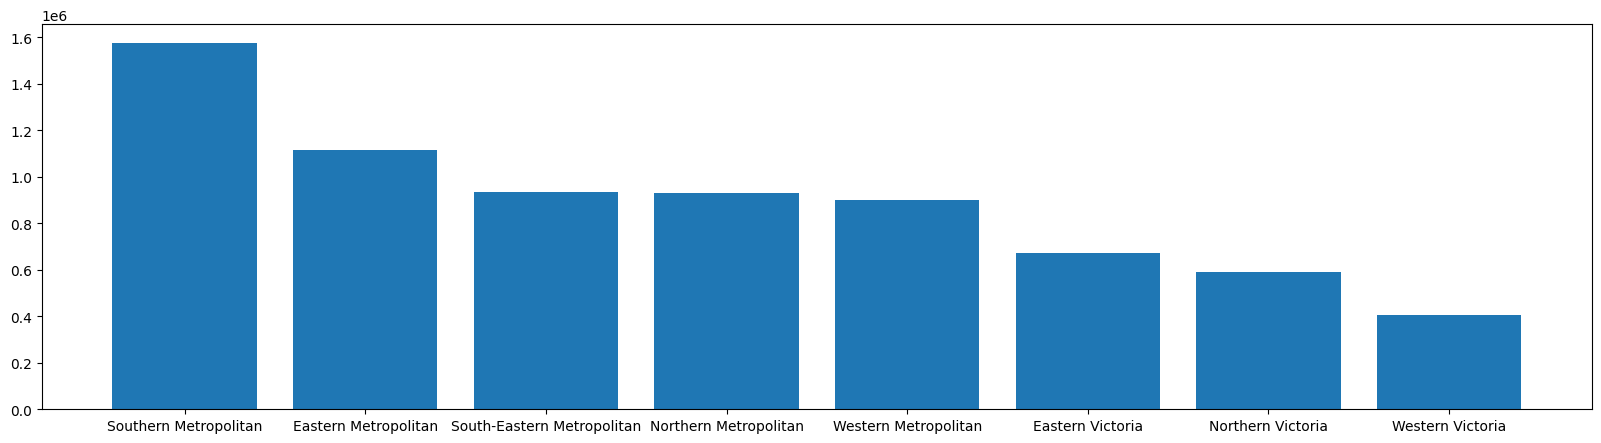

'Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi:'

,CouncilArea,Price
1,Boroondara,1.858732e+06
9,undetermined,1.826611e+06
0,Bayside,1.772192e+06
7,Stonnington,1.771333e+06
6,Port Phillip,1.459685e+06


'Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi:'

,Type,Price
0,h,1.858393e+06
1,t,1.203474e+06
2,u,7.160714e+05


'Metode penjualan properti (Method) yang paling sering dilakukan:'

,Method,count
0,S,1429
1,PI,346
2,VB,273
3,SP,160
4,SA,18


In [61]:
dfRegionPrice = dfYearClean.groupby('Regionname')['Price'].mean().reset_index()
dfRegionPrice = dfRegionPrice.sort_values('Price',ascending=False)
display('Regionn dengan rata-rata properti paling tinggi :', dfRegionPrice.head(1))

plt.figure(figsize=(20,5))
plt.bar(dfRegionPrice['Regionname'],dfRegionPrice['Price'])
plt.show()

dfSouthMetro = dfYearClean[dfYearClean['Regionname']=='Southern Metropolitan']
dfSouthMetroCouncil = dfSouthMetro.groupby('CouncilArea')['Price'].mean().reset_index()
dfSouthMetroCouncil = dfSouthMetroCouncil.sort_values('Price',ascending=False)
display('Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi:',dfSouthMetroCouncil.head())




dfSouthMetroType = dfSouthMetro.groupby('Type')['Price'].mean().reset_index()
dfSouthMetroCouncil = dfSouthMetroCouncil.sort_values('Price',ascending=False)
display('Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi:', dfSouthMetroType.head())


dfSouthMetroMethod = dfSouthMetro['Method'].value_counts().reset_index()
display('Metode penjualan properti (Method) yang paling sering dilakukan:',dfSouthMetroMethod)



7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name!

In [62]:
from scipy.stats import f_oneway

Hypothesis:
- Ho: Mean harga properti dari semua kelompok adalah sama. (kelompok: Regionname)
- Ha: Minimal ada 1 kelompok yang mean harga properti berbeda. Tapi kita tidak tahu kelompok yang mana.

In [64]:
stat, pvalue = f_oneway(
    dfYearClean[dfYearClean['Regionname']=='Southern Metropolitan']['Price'],
    dfYearClean[dfYearClean['Regionname']=='Eastern Metropolitan']['Price'],
    dfYearClean[dfYearClean['Regionname']=='South-Eastern Metropolitan']['Price'],
    dfYearClean[dfYearClean['Regionname']=='Northern Metropolitan']['Price'],
    dfYearClean[dfYearClean['Regionname']=='Western Metropolitan']['Price'],
    dfYearClean[dfYearClean['Regionname']=='Eastern Victoria']['Price'],
    dfYearClean[dfYearClean['Regionname']=='Northern Victoria']['Price'],
    dfYearClean[dfYearClean['Regionname']=='Western Victoria']['Price']
)

pvalue

0.0

In [66]:
if pvalue > 0.05:
    print(f'''
    pvalue={pvalue}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti bahwa 
    minimal salah satu kelompok ada yang berbeda rata-rata study hours-nya. Tapi kita tidak tahu yang mana.
    (Rata-ratanya tidak berbeda signifikan)
    ''')
    
else:
    print(f'''
    pvalue={pvalue}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti bahwa 
    minimal salah satu kelompok ada yang berbeda rata-rata study hours-nya. Tapi kita tidak tahu yang mana.
    (Rata-ratanya berbeda signifikan)
    ''')


    pvalue=0.0. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti bahwa 
    minimal salah satu kelompok ada yang berbeda rata-rata study hours-nya. Tapi kita tidak tahu yang mana.
    (Rata-ratanya berbeda signifikan)
    
